In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [ ]:
# df = pd.read_csv("../input/ss3-hackathon-online-signal-processing/SN_Test/test_data_1.csv")
df = pd.read_csv("../input/ss3-hackathon-online-signal-processing/SN_Train/normal_1411_1.csv")
# df = pd.read_csv("../input/ss3-hackathon-online-signal-processing/SN_Train/normal_576_1.csv")
# df = pd.read_csv("../input/ss3-hackathon-online-signal-processing/SN_Train/normal_576_10.csv")
# df = pd.read_csv("../input/ss3-hackathon-online-signal-processing/SN_Train/unbalanceM1_1411_1.csv")

In [ ]:
df.head()
# df.columns
# df.info()
# df['V1A'] = pd.to_numeric(df['V1A'], errors='coerce')

# Read file
functional, clean data, remove DC Bias, reduce noise by lfilter, transpose_to( #files, #sample_size, #components )

In [ ]:
from scipy.signal import lfilter

TRAIN_FOLDER = '/kaggle/input/ss3-hackathon-online-signal-processing/SN_Train/'
TEST_FOLDER = '/kaggle/input/ss3-hackathon-online-signal-processing/SN_Test/'

def do_lfilter(y):
    n = 15  # the larger n is, the smoother curve will be
    b = [1.0 / n] * n
    a = 1
    yy = lfilter(b, a, y)
    return yy

def folder_tosignal(folder):
    md = 1e9
    fi2 = True
    for f in os.listdir(folder):
        df = pd.read_csv(folder + f)
        df = df[df['waveform'].str.contains('t0')==False]
        df = df[df['waveform'].str.contains('delta t')==False]
        df = df[df['waveform'].str.contains('time')==False]
        df = df[df['waveform'].str.contains('wave')==False]
        df = df.drop(['waveform'], axis=1)
        fi = True
        for col in df.columns:
            df[col] = pd.to_numeric(df[col])
            signal = df[col].to_numpy()
            signal = signal - np.mean(signal) # Remove DC Bias
            signal = do_lfilter(signal) # Reduce Noise by lfilter
            signal_components = signal if fi else np.vstack((signal_components, signal)) # stack signal (10000+ sample) each sensor component (6)
            fi = False
        md = min(signal_components.shape[1], md) # select least sample size for all signals
        all_signals = signal_components if fi2 else np.dstack((all_signals[:, :md], signal_components[:, :md])) # stack motor signal (1000+)
        print(f'converting {f}: {all_signals.shape}')
        fi2 = False

    all_signals = np.transpose(all_signals, (2, 1, 0))
    return all_signals

train_signal = folder_tosignal(TRAIN_FOLDER)
test_signal = folder_tosignal(TEST_FOLDER)

In [439]:
train_signal.shape
train_signal_2 = train_signal[:, :9000, :]
train_signal_3 = train_signal[:, 11000:, :]
train_signal_2.shape, train_signal_3.shape

((1190, 9000, 6), (1190, 8978, 6))

In [ ]:
def get_file_name(folder):
    l = []
    for f in os.listdir(folder):
        l.append(f)
    return pd.DataFrame(l)

file_df = get_file_name(TEST_FOLDER)
file_df

In [ ]:
def get_file_num(folder):
    l = []
    for f in os.listdir(folder):
        l.append(f.split('_')[2].split('.')[0])
    return pd.DataFrame(l).astype('int64')

num_df = get_file_num(TEST_FOLDER)
num_df

In [ ]:
# train เก่า
TRAIN_FOLDER = '/kaggle/input/ss3-hackathon-online-signal-processing/SN_Train/'

test_file = ['normal_1411_1.csv', 'unbalanceM1_1411_1.csv', 'unbalanceM2_1411_1.csv']

x_train = np.array([])
y_train = []
md = 1e9
fi2 = True

for f in os.listdir(TRAIN_FOLDER):
    df = pd.read_csv(TRAIN_FOLDER + f)
    df = df[df['waveform'].str.contains('t0')==False]
    df = df[df['waveform'].str.contains('delta t')==False]
    df = df[df['waveform'].str.contains('time')==False]
    df = df[df['waveform'].str.contains('wave')==False]
    df = df.drop(['waveform'], axis=1)
    fi = True
    for col in df.columns:
        df[col] = pd.to_numeric(df[col])
        sig = df[col].to_numpy()
#         print(sig.shape)
        s = sig if fi else np.vstack((s, sig))
#         print(s.shape)
        fi = False
    c = f.split('_')[0]
    y_train.append(c)
#     print(s.shape, x_train.shape)
    md = min(s.shape[1], md)
#     print(md)
    x_train = s if fi2 else np.dstack((x_train[:, :md], s[:, :md]))
    print(f'converting {f}: {x_train.shape}')
    fi2 = False
#     x_train.append(s)

t = np.transpose(x_train, (2, 1, 0))

In [ ]:
# Test
TEST_FOLDER = '/kaggle/input/ss3-hackathon-online-signal-processing/SN_Test/'

x_test = np.array([])
md = 1e9
fi2 = True

for f in os.listdir(TEST_FOLDER):
    df = pd.read_csv(TEST_FOLDER + f)
    df = df[df['waveform'].str.contains('t0')==False]
    df = df[df['waveform'].str.contains('delta t')==False]
    df = df[df['waveform'].str.contains('time')==False]
    df = df[df['waveform'].str.contains('wave')==False]
    df = df.drop(['waveform'], axis=1)
    fi = True
    for col in df.columns:
        df[col] = pd.to_numeric(df[col])
        sig = df[col].to_numpy()
#         print(sig.shape)
        s = sig if fi else np.vstack((s, sig))
#         print(s.shape)
        fi = False
#     c = f.split('_')[0]
#     y_train.append(c)
#     print(s.shape, x_train.shape)
    md = min(s.shape[1], md)
#     print(md)
    x_test = s if fi2 else np.dstack((x_test[:, :md], s[:, :md]))
    print(f'converting {f}: {x_test.shape}')
    fi2 = False
#     x_train.append(s)

X_test = np.transpose(x_test, (2, 1, 0))

In [ ]:
X_test.shape

In [ ]:
t = np.transpose(x_train, (2, 1, 0))
tt = np.transpose(x_train, (1, 2, 0))

In [ ]:
N = train_signals.shape[1]
f_s = 10000
T = 1 / f_s

In [ ]:
N, f_s, T

In [ ]:
# the number of signals in the training set is 7352 
# and the number of signals in the test set is 2947 
# And each signal in the training and test set has a length of 128 samples 
# and 9 different components.
# (7352, 128, 9)
# (2947, 128, 9)
# My Signal
# (1000, 10000, 6) use t (2, 1, 0)
x_train.shape, t.shape, tt.shape

In [ ]:
X_train = t
X_train.shape

In [ ]:
y_train

In [ ]:
Y_train = np.array(y_train)

In [ ]:
dfy = pd.DataFrame(y_train)
dfy.iloc[:, 0].unique()

# Encode Y_train

In [ ]:
INPUT_FOLDER_TRAIN = '/kaggle/input/ss3-hackathon-online-signal-processing/SN_Train/'

def read_labels(folder):
    motors = []
    for file in os.listdir(folder):
        m = file.split('_')[0]
        motors.append(m)
    return np.array(motors)

train_labels = read_labels(INPUT_FOLDER_TRAIN)
train_labels

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(['normal', 'unbalanceM1', 'unbalanceM2', 'unbalanceM3'])
Y_train = le.transform(train_labels)
Y_train

In [ ]:
Y_train, Y_train.shape

In [ ]:
np.save('X_train.npy', X_train)

In [ ]:
x = np.load('X_train.npy')
x.shape

In [ ]:
X_train.shape, Y_train.shape, X_test.shape

In [ ]:
train_signals = X_train
train_labels = Y_train
test_signals = X_test

In [ ]:
TRAIN_FOLDER = '/kaggle/input/ss3-hackathon-online-signal-processing/SN_Train'
TEST_FOLDER = '/kaggle/input/ss3-hackathon-online-signal-processing/SN_Test'
x_train = np.array([])
rpm = []
y_train = []
test_file = ['normal_1411_1.csv', 'unbalanceM1_1411_1.csv', 'unbalanceM2_1411_1.csv']
fi2 = True
md = 100000
for f in test_file: # os.listdir(TRAIN_FOLDER):
    df = pd.read_csv(TRAIN_FOLDER + '/' + f)
    df = df[df['waveform'].str.contains('t0')==False]
    df = df[df['waveform'].str.contains('delta t')==False]
    df = df[df['waveform'].str.contains('time')==False]
    df = df[df['waveform'].str.contains('wave')==False]
    df = df.drop(['waveform'], axis=1)
    fi = True
    for col in df.columns:
        df[col] = pd.to_numeric(df[col])
        sig = df[col].to_numpy()
#         print(sig.shape)
        s = sig if fi else np.vstack((s, sig))
#         print(s.shape)
        fi = False
    c, r = f.split('_')[:2]
    rpm.append(r)
    y_train.append(c)
    print(s.shape, x_train.shape)
    md = min(s.shape[1], md)
#     print(md)
    x_train = s if fi2 else np.dstack((x_train[:, :md], s[:, :md]))
    fi2 = False
#     x_train.append(s)

t = x_train.reshape((3, 19993, 6))
x_train.shape, t.shape, s.shape, s.transpose().shape

In [ ]:
def read_signals(filename):
    df = pd.read_csv(filename)
    df = df[df['waveform'].str.contains('t0')==False]
    df = df[df['waveform'].str.contains('delta t')==False]
    df = df[df['waveform'].str.contains('time')==False]
    df = df[df['waveform'].str.contains('wave')==False]
    df = df.drop(['waveform'], axis=1)
    data = np.array(df, dtype=np.float32)
    print(f'converting {filename}: {data.shape}')
    return data

def read_labels(folder):
    motors = []
    for file in os.listdir(folder):
        m = f.split('_')[0]
    return np.array(motors)

# def read_labels(foldername):        
#     with open(filename, 'r') as fp:
#         activities = fp.read().splitlines()
#         activities = list(map(int, activities))
#     return np.array(motors)

INPUT_FOLDER_TRAIN = '/kaggle/input/ss3-hackathon-online-signal-processing/SN_Train/'
INPUT_FOLDER_TEST = '/kaggle/input/ss3-hackathon-online-signal-processing/SN_Train/'

train_signals, test_signals = [], []

md = 1e9

for input_file in os.listdir(INPUT_FOLDER_TRAIN):
    signal = read_signals(INPUT_FOLDER_TRAIN + input_file)
#     md = min(signal[0], md)
#     train_signals.append(signal[:md, :])
    train_signals.append(signal)
train_signals = np.transpose(np.array(train_signals), (1, 2, 0))

for input_file in os.listdir(INPUT_FOLDER_TEST):
    signal = read_signals(INPUT_FOLDER_TEST + input_file)
    test_signals.append(signal)
test_signals = np.transpose(np.array(test_signals), (1, 2, 0))

In [ ]:
train_labels

In [ ]:
train_signals

# Plot graph

In [ ]:
from scipy.fftpack import fft
from scipy.signal import welch
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [ ]:
df['V1A'].count()

In [ ]:
%config Completer.use_jedi = False

In [ ]:
y

In [ ]:
# lfilter
from scipy.signal import lfilter

n = 15  # the larger n is, the smoother curve will be
b = [1.0 / n] * n
a = 1
yy = lfilter(b, a, y)
plt.plot(x, yy, linewidth=2, linestyle="-", c="b")  # smooth by filter

In [ ]:
fig, ax = plt.subplots()
N = df['V1A'].count()
# N = 1000
T = 1.0 / 10000.0
x = np.linspace(0, 10, N)
y = df.iloc[:N, 2].to_numpy()
y = y - np.mean(y) # DC Offset !!!
ax.plot(x, y)
# ax.scatter(x, df.iloc[:N, 2])
plt.show()

fig, ax = plt.subplots()
x = np.linspace(0.0, N*T, N, endpoint=False)
yf = fft(yy)
xf = fftfreq(N, T)[:N//2]
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

In [ ]:
def get_fft_values(y_values, T, N, f_s):
    f_values = np.linspace(0.0, 1.0/(2.0*T), N//2)
    fft_values_ = fft(y_values)
    fft_values = 2.0/N * np.abs(fft_values_[0:N//2])
    return f_values, fft_values
 
t_n = 10
N = df['V1A'].count()
# N = 1000
T = t_n / N
# T = 1 / f_s
# f_s = 10000
 
f_values, fft_values = get_fft_values(df.iloc[:N, 2].to_numpy(), T, N, f_s)
 
plt.plot(f_values, fft_values, linestyle='-', color='blue')
plt.xlabel('Frequency [Hz]', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)
plt.title("Frequency domain of the signal", fontsize=16)
plt.show()

In [ ]:
f_values, psd_values = get_psd_values(df.iloc[:N, 2].to_numpy(), T, N, f_s)
 
plt.plot(f_values, psd_values, linestyle='-', color='blue')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [V**2 / Hz]')
plt.show()

In [ ]:
yf.dtype

# Copy preprocess

In [ ]:
def get_fft_values(y_values, T, N, f_s):
    f_values = np.linspace(0.0, 1.0/(2.0*T), N//2)
    fft_values_ = fft(y_values)
    fft_values = 2.0/N * np.abs(fft_values_[0:N//2])
    return f_values, fft_values

def get_psd_values(y_values, T, N, f_s):
    f_values, psd_values = welch(y_values, fs=f_s)
    return f_values, psd_values

def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[len(result)//2:]

def get_autocorr_values(y_values, T, N, f_s):
    autocorr_values = autocorr(y_values)
    x_values = np.array([T * jj for jj in range(0, N)])
    return x_values, autocorr_values

In [ ]:
# Copied From http://nbviewer.ipython.org/github/demotu/BMC/blob/master/notebooks/DetectPeaks.ipynb
# Thank you Marcos Duarte

def detect_peaks(x, mph=None, mpd=1, threshold=0, edge='rising',
                 kpsh=False, valley=False, show=False, ax=None):

    """Detect peaks in data based on their amplitude and other features.
    Parameters
    ----------
    x : 1D array_like
        data.
    mph : {None, number}, optional (default = None)
        detect peaks that are greater than minimum peak height.
    mpd : positive integer, optional (default = 1)
        detect peaks that are at least separated by minimum peak distance (in
        number of data).
    threshold : positive number, optional (default = 0)
        detect peaks (valleys) that are greater (smaller) than `threshold`
        in relation to their immediate neighbors.
    edge : {None, 'rising', 'falling', 'both'}, optional (default = 'rising')
        for a flat peak, keep only the rising edge ('rising'), only the
        falling edge ('falling'), both edges ('both'), or don't detect a
        flat peak (None).
    kpsh : bool, optional (default = False)
        keep peaks with same height even if they are closer than `mpd`.
    valley : bool, optional (default = False)
        if True (1), detect valleys (local minima) instead of peaks.
    show : bool, optional (default = False)
        if True (1), plot data in matplotlib figure.
    ax : a matplotlib.axes.Axes instance, optional (default = None).
    Returns
    -------
    ind : 1D array_like
        indeces of the peaks in `x`.
    Notes
    -----
    The detection of valleys instead of peaks is performed internally by simply
    negating the data: `ind_valleys = detect_peaks(-x)`
    
    The function can handle NaN's 
    See this IPython Notebook [1]_.
    References
    ----------
    .. [1] http://nbviewer.ipython.org/github/demotu/BMC/blob/master/notebooks/DetectPeaks.ipynb
    Examples
    --------
    >>> from detect_peaks import detect_peaks
    >>> x = np.random.randn(100)
    >>> x[60:81] = np.nan
    >>> # detect all peaks and plot data
    >>> ind = detect_peaks(x, show=True)
    >>> print(ind)
    >>> x = np.sin(2*np.pi*5*np.linspace(0, 1, 200)) + np.random.randn(200)/5
    >>> # set minimum peak height = 0 and minimum peak distance = 20
    >>> detect_peaks(x, mph=0, mpd=20, show=True)
    >>> x = [0, 1, 0, 2, 0, 3, 0, 2, 0, 1, 0]
    >>> # set minimum peak distance = 2
    >>> detect_peaks(x, mpd=2, show=True)
    >>> x = np.sin(2*np.pi*5*np.linspace(0, 1, 200)) + np.random.randn(200)/5
    >>> # detection of valleys instead of peaks
    >>> detect_peaks(x, mph=0, mpd=20, valley=True, show=True)
    >>> x = [0, 1, 1, 0, 1, 1, 0]
    >>> # detect both edges
    >>> detect_peaks(x, edge='both', show=True)
    >>> x = [-2, 1, -2, 2, 1, 1, 3, 0]
    >>> # set threshold = 2
    >>> detect_peaks(x, threshold = 2, show=True)
    """

    x = np.atleast_1d(x).astype('float64')
    if x.size < 3:
        return np.array([], dtype=int)
    if valley:
        x = -x
    # find indices of all peaks
    dx = x[1:] - x[:-1]
    # handle NaN's
    indnan = np.where(np.isnan(x))[0]
    if indnan.size:
        x[indnan] = np.inf
        dx[np.where(np.isnan(dx))[0]] = np.inf
    ine, ire, ife = np.array([[], [], []], dtype=int)
    if not edge:
        ine = np.where((np.hstack((dx, 0)) < 0) & (np.hstack((0, dx)) > 0))[0]
    else:
        if edge.lower() in ['rising', 'both']:
            ire = np.where((np.hstack((dx, 0)) <= 0) & (np.hstack((0, dx)) > 0))[0]
        if edge.lower() in ['falling', 'both']:
            ife = np.where((np.hstack((dx, 0)) < 0) & (np.hstack((0, dx)) >= 0))[0]
    ind = np.unique(np.hstack((ine, ire, ife)))
    # handle NaN's
    if ind.size and indnan.size:
        # NaN's and values close to NaN's cannot be peaks
        ind = ind[np.in1d(ind, np.unique(np.hstack((indnan, indnan-1, indnan+1))), invert=True)]
    # first and last values of x cannot be peaks
    if ind.size and ind[0] == 0:
        ind = ind[1:]
    if ind.size and ind[-1] == x.size-1:
        ind = ind[:-1]
    # remove peaks < minimum peak height
    if ind.size and mph is not None:
        ind = ind[x[ind] >= mph]
    # remove peaks - neighbors < threshold
    if ind.size and threshold > 0:
        dx = np.min(np.vstack([x[ind]-x[ind-1], x[ind]-x[ind+1]]), axis=0)
        ind = np.delete(ind, np.where(dx < threshold)[0])
    # detect small peaks closer than minimum peak distance
    if ind.size and mpd > 1:
        ind = ind[np.argsort(x[ind])][::-1]  # sort ind by peak height
        idel = np.zeros(ind.size, dtype=bool)
        for i in range(ind.size):
            if not idel[i]:
                # keep peaks with the same height if kpsh is True
                idel = idel | (ind >= ind[i] - mpd) & (ind <= ind[i] + mpd) \
                    & (x[ind[i]] > x[ind] if kpsh else True)
                idel[i] = 0  # Keep current peak
        # remove the small peaks and sort back the indices by their occurrence
        ind = np.sort(ind[~idel])

    if show:
        if indnan.size:
            x[indnan] = np.nan
        if valley:
            x = -x
        _plot(x, mph, mpd, threshold, edge, valley, ax, ind)

    return ind


In [462]:
def get_first_n_peaks(x,y,no_peaks=5):
    x_, y_ = list(x), list(y)
    if len(x_) >= no_peaks:
        return x_[:no_peaks], y_[:no_peaks]
    else:
        missing_no_peaks = no_peaks-len(x_)
        return x_ + [0]*missing_no_peaks, y_ + [0]*missing_no_peaks
    
def get_features(x_values, y_values, mph):
    indices_peaks = detect_peaks(y_values, mph=mph)
    peaks_x, peaks_y = get_first_n_peaks(x_values[indices_peaks], y_values[indices_peaks])
    return peaks_x + peaks_y

def extract_features(dataset, T, N, f_s, denominator):
    percentile = 5
    list_of_features = []
    for signal_no in range(0, len(dataset)):
        features = []
        for signal_comp in range(0,dataset.shape[2]):
            signal = dataset[signal_no, :, signal_comp]
            
            signal_min = np.nanpercentile(signal, percentile)
            signal_max = np.nanpercentile(signal, 100-percentile)
            #ijk = (100 - 2*percentile)/10
            mph = signal_min + (signal_max - signal_min)/denominator
            
            features += get_features(*get_psd_values(signal, T, N, f_s), mph)
            features += get_features(*get_fft_values(signal, T, N, f_s), mph)
            features += get_features(*get_autocorr_values(signal, T, N, f_s), mph)
        list_of_features.append(features)
    return np.array(list_of_features)

# def extract_features_labels(dataset, labels, T, N, f_s, denominator):
#     percentile = 5
#     list_of_features = []
#     list_of_labels = []
#     for signal_no in range(0, len(dataset)):
#         features = []
#         list_of_labels.append(labels[signal_no])
#         for signal_comp in range(0,dataset.shape[2]):
#             signal = dataset[signal_no, :, signal_comp]
            
#             signal_min = np.nanpercentile(signal, percentile)
#             signal_max = np.nanpercentile(signal, 100-percentile)
#             #ijk = (100 - 2*percentile)/10
#             mph = signal_min + (signal_max - signal_min)/denominator
            
#             features += get_features(*get_psd_values(signal, T, N, f_s), mph)
#             features += get_features(*get_fft_values(signal, T, N, f_s), mph)
#             features += get_features(*get_autocorr_values(signal, T, N, f_s), mph)
#         list_of_features.append(features)
#     return np.array(list_of_features), np.array(list_of_labels)

from scipy.fftpack import fft
from scipy.signal import welch
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

denominator = 10
f_s = 10000
T = 1 / f_s

N = train_signal_2.shape[1]
X_train_2 = extract_features(train_signal_2, T, N, f_s, denominator)

N = train_signal_3.shape[1]
X_train_3 = extract_features(train_signal_3, T, N, f_s, denominator)

# N = train_signal.shape[1]
# X_train = extract_features(train_signal, T, N, f_s, denominator)


# N = test_signal.shape[1]
# X_test = extract_features(test_signal, T, N, f_s, denominator)

In [465]:
X_train.shape, Y_train.shape, X_test.shape

((1190, 180), (1190,), (360, 180))

In [466]:
X_train_2.shape, X_train_3.shape, Y_train.shape

((1190, 180), (1190, 180), (1190,))

# Improve Model

### split train-val for model improving

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
 
clf = RandomForestClassifier(n_estimators=1000)
clf.fit(X_train, Y_train)
print("Accuracy on training set is : {}".format(clf.score(X_train, Y_train)))
Y_test_pred = clf.predict(X_test)
Y_test_pred

In [ ]:
!pip install -Uqq fastai

In [ ]:
!pip install fastai==2.1.4
!pip install fastcore==1.3.1

### fastai tabular

In [ ]:
from fastai.tabular.all import *

In [470]:
df = pd.DataFrame(X_train)
df['label'] = pd.DataFrame(Y_train)
# df['label'] = pd.DataFrame(train_labels)
df

,0,1,2,3,4,5,6,7,8,9,...,171,172,173,174,175,176,177,178,179,label
0,78.1250,351.5625,859.3750,1093.7500,1210.9375,1.471417e-13,7.177318e-14,7.760833e-14,1.642889e-13,1.602490e-14,...,0.0011,0.0016,0.0022,0.0027,9.515464e-07,7.918398e-07,4.777515e-07,3.650963e-07,5.911870e-07,1
1,117.1875,234.3750,351.5625,820.3125,937.5000,4.406612e-13,5.059633e-13,2.574743e-13,1.867089e-14,4.230584e-14,...,0.0017,0.0021,0.0027,0.0034,1.384486e-06,3.136128e-07,1.089686e-07,-3.316527e-08,-1.414119e-07,0
2,117.1875,273.4375,390.6250,820.3125,1015.6250,8.093219e-13,6.190887e-13,2.549357e-13,3.636674e-14,1.941686e-14,...,0.0010,0.0018,0.0022,0.0026,1.058381e-06,4.850851e-07,-1.508841e-08,-1.176271e-08,-6.152620e-08,3
3,78.1250,195.3125,390.6250,820.3125,976.5625,2.140901e-13,4.020324e-13,1.224502e-13,2.646162e-14,2.858517e-14,...,0.0010,0.0016,0.0021,0.0026,1.385756e-06,1.024189e-06,5.380418e-07,5.573701e-07,5.100423e-07,3
4,195.3125,390.6250,820.3125,898.4375,976.5625,6.371380e-13,1.818274e-13,1.406459e-14,1.635811e-14,1.740135e-14,...,0.0010,0.0015,0.0021,0.0026,1.473684e-06,1.001711e-06,4.395616e-07,4.866695e-07,4.350124e-07,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,78.1250,273.4375,390.6250,859.3750,1093.7500,1.271843e-13,8.363714e-14,1.062924e-13,1.726324e-13,8.210826e-14,...,0.0011,0.0016,0.0022,0.0027,1.363062e-06,1.154653e-06,8.777474e-07,7.833465e-07,9.905871e-07,3
1186,78.1250,234.3750,390.6250,859.3750,1093.7500,2.842236e-13,1.510470e-13,9.743955e-14,1.573400e-13,1.301876e-13,...,0.0010,0.0016,0.0022,0.0027,1.817883e-06,1.338848e-06,7.801405e-07,5.833450e-07,8.842247e-07,3
1187,156.2500,273.4375,429.6875,820.3125,976.5625,4.615996e-13,3.720279e-13,1.418144e-13,3.394650e-14,5.200200e-14,...,0.0009,0.0018,0.0021,0.0026,6.817668e-07,3.297544e-07,-1.311787e-08,-3.197573e-09,4.476776e-08,0
1188,195.3125,390.6250,781.2500,976.5625,1171.8750,6.987004e-13,1.916991e-13,2.201743e-14,1.891607e-14,8.919032e-15,...,0.0010,0.0016,0.0021,0.0026,1.287038e-06,8.601153e-07,2.834893e-07,2.925362e-07,2.048241e-07,2


In [490]:
cont_names = list(range(180))
# cont_names = [str(i) for i in list(range(180))]

# splits = RandomSplitter()(range_of(df))
splits = RandomSplitter(valid_pct=0.2)(range_of(df))

to = TabularPandas(df, procs=[Categorify, FillMissing, Normalize],
                   cont_names = cont_names,
                   y_names='label',
                   y_block = CategoryBlock,
                   splits=splits)

In [491]:
to.xs.iloc[:2]

,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
581,0.041113,-0.524226,-0.914018,-0.587774,-0.884509,-6.298075e-07,0.000002,0.000001,6.448479e-07,9.239952e-07,...,-0.032345,-0.608149,-0.569793,-0.303382,-0.063320,0.987274,0.468907,-0.510078,-0.946172,-1.145706
1135,0.041113,-0.153451,-0.569474,-0.587774,-0.884509,1.167563e-06,0.000002,0.000001,1.582086e-06,-2.812124e-07,...,-0.032345,-0.608149,0.109535,-0.303382,0.463145,-0.531355,-0.324756,-0.877664,-0.613600,-0.562727


In [492]:
dls = to.dataloaders(bs=64)
dls.show_batch()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,label
0,78.1250,351.5625,820.3125,1093.7500,1210.9375,1.009821e-13,6.562204e-14,6.667117e-14,1.062362e-13,2.113447e-14,1.001201,2.503004,5.006007,6.007209,7.509011,3.336716e-07,4.386048e-07,3.789229e-07,2.961895e-07,3.875914e-07,0.0005,0.0010,0.0017,0.0022,0.0027,5.760471e-07,5.064908e-07,2.788481e-07,3.631927e-07,5.363459e-07,117.1875,273.4375,390.6250,546.875000,859.3750,1.888569e-13,3.307332e-13,8.226499e-14,2.352361e-14,3.698736e-13,0.500601,1.501802,2.503004,3.504205,6.007209,2.383337e-07,3.233193e-07,4.464992e-07,2.871671e-07,4.098074e-07,0.0010,0.0018,0.0027,0.0036,0.0046,1.246454e-06,-1.069776e-07,5.889075e-07,1.230115e-06,8.254618e-07,39.0625,117.1875,273.4375,390.6250,468.7500,1.000333e-13,7.697772e-14,7.024488e-14,9.238390e-14,5.473622e-14,0.500601,2.002403,3.504205,5.006007,6.507809,6.624969e-07,3.813976e-07,1.871998e-07,2.927847e-07,2.148961e-07,0.0009,0.0019,0.0027,0.0037,0.0046,3.826185e-07,2.237036e-07,3.201886e-07,1.674097e-07,1.699858e-07,78.1250,273.4375,859.3750,1015.6250,1093.7500,1.344179e-13,7.553143e-14,3.021914e-14,5.101467e-14,2.491070e-13,1.501802,3.504205,4.505406,6.007209,8.510212,4.767303e-07,4.686533e-07,3.919065e-07,5.067271e-07,3.589114e-07,0.0005,0.0011,0.0016,0.0022,0.0027,0.000007,0.000006,0.000005,0.000005,6.702480e-06,78.1250,273.437500,429.6875,546.8750,742.1875,1.590622e-13,1.631443e-13,5.425467e-14,1.557157e-14,8.381022e-15,0.500601,2.002403,4.004806,5.506608,7.008410,4.184861e-07,9.058095e-07,3.767813e-07,4.270682e-07,2.320556e-07,0.0005,0.0011,0.0017,0.0022,0.0028,0.000003,0.000003,1.779532e-06,1.931972e-06,2.487019e-06,39.0625,117.1875,234.3750,1015.6250,1093.7500,1.300860e-13,1.151258e-13,9.835383e-14,2.715827e-14,6.793880e-14,0.500601,1.501802,3.504205,4.505406,5.506608,5.428759e-07,4.770180e-07,4.137233e-07,3.522972e-07,3.570850e-07,0.0005,0.0011,0.0016,0.0022,0.0027,9.708441e-07,8.188736e-07,5.347439e-07,4.310807e-07,5.984683e-07,1
1,117.1875,234.3750,351.5625,820.3125,937.5000,3.321464e-13,3.870617e-13,2.023236e-13,1.650726e-14,5.064643e-14,1.001201,2.002403,3.003604,4.505406,6.007209,4.362996e-07,1.232215e-06,1.892727e-06,5.723390e-07,1.346347e-07,0.0005,0.0011,0.0017,0.0022,0.0028,2.358337e-06,7.340736e-07,6.206166e-08,6.582026e-08,5.685790e-08,117.1875,234.3750,351.5625,937.500000,1093.7500,2.016169e-12,1.074837e-12,8.896942e-13,1.716789e-13,1.684340e-13,1.501802,3.504205,5.006007,6.007209,8.510212,7.055897e-07,2.163088e-06,7.989791e-07,3.544729e-07,1.430415e-06,0.0004,0.0018,0.0022,0.0027,0.0031,5.697368e-06,-5.831176e-07,-5.940531e-07,-5.865297e-07,-6.308525e-07,117.1875,312.5000,937.5000,1445.3125,1640.6250,6.674522e-13,1.812345e-13,6.036359e-14,4.129492e-15,3.901151e-14,0.500601,2.002403,3.504205,6.007209,8.009611,3.920740e-07,2.174650e-06,3.971407e-06,3.320199e-07,5.973542e-07,0.0004,0.0018,0.0022,0.0026,0.0030,2.913551e-06,8.169802e-07,7.272769e-07,3.486061e-07,2.134782e-07,117.1875,234.3750,351.5625,1015.6250,1171.8750,9.352959e-13,4.152117e-13,3.089207e-13,6.355842e-14,2.849906e-14,0.500601,2.002403,3.504205,5.506608,8.510212,2.225669e-07,2.221353e-06,2.772603e-06,3.604545e-07,2.065168e-06,0.0005,0.0011,0.0018,0.0023,0.0028,0.000009,0.000004,0.000002,0.000002,8.969689e-07,117.1875,234.375000,351.5625,937.5000,1054.6875,1.321551e-12,4.698323e-13,4.400456e-13,4.849863e-14,2.957808e-14,0.500601,2.002403,3.504205,4.505406,6.507809,2.341198e-07,1.235821e-06,1.980480e-06,6.6

In [493]:
# learn = tabular_learner(dls, metrics=f1_macro)
learn = tabular_learner(dls, metrics=accuracy)

SuggestedLRs(valley=0.0012022644514217973)

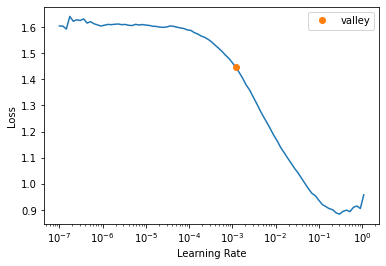

In [494]:
learn.lr_find()

In [495]:
# learn.fit_one_cycle(2, 0.001737800776027143)
learn.fit_one_cycle(1000, 0.001737800776027143)

epoch,train_loss,valid_loss,accuracy,time
0,1.501750,1.355991,0.352941,00:00
1,1.387971,1.238542,0.495798,00:00
2,1.286551,1.111546,0.554622,00:00
3,1.190617,1.014198,0.600840,00:00
4,1.106985,0.939640,0.630252,00:00
5,1.029336,0.878264,0.663866,00:00
6,0.957870,0.826535,0.689076,00:00
7,0.893007,0.779831,0.714286,00:00
8,0.834610,0.737816,0.752101,00:00
9,0.779259,0.707300,0.773109,00:00


In [496]:
learn.show_results()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,label,label_pred
0,-0.869109,-0.895001,1.153245,0.408477,-0.182799,3.477834e-06,1.791933e-06,-9.644816e-07,-1.693600e-07,-3.726379e-07,-0.799293,-0.682173,-1.091320,-0.404256,-0.756660,0.395371,0.006144,0.900747,-0.288574,-0.227716,-0.034458,-0.910849,-1.818951,-1.807628,-1.566962,0.972857,1.988950,2.015506,0.819199,0.159599,-0.016257,-0.993747,-0.731577,-0.004343,-0.588425,4.067065e-06,1.125096e-06,2.742145e-06,-1.160288e-06,-6.466205e-07,-0.852605,-0.099890,-0.616782,0.134021,1.415741,1.320744,1.036434,1.192809,0.527696,2.350520,-0.465514,0.626410,0.102061,0.375546,0.183034,1.156280,-0.838320,-0.954995,-0.103190,-1.048728,0.866132,-0.258136,0.736771,0.137579,-0.404893,2.803297e-06,3.019562e-06,-1.081224e-06,-2.321735e-07,2.160469e-08,-0.906129,-1.259837,-1.551551,-1.868359,-1.715523,-0.589407,-0.742846,0.915176,1.353459,-0.268861,0.712722,0.561547,1.463370,0.547609,2.836348,-0.994726,-1.194544,-0.519683,-0.277988,-1.373554,0.682133,0.396393,1.362555,0.661534,0.268954,1.967305e-06,-5.507807e-07,-1.069365e-06,-1.844772e-07,-1.095016e-06,2.765040,1.211709,0.357586,0.984423,0.816581,3.252563,1.679624,-0.527879,-0.139574,-0.079721,-0.000582,0.605114,1.028128,0.566137,1.222523,0.097555,-1.093883,0.088724,-0.399372,-0.621945,0.804941,-0.113185,-0.566330,0.504209,0.362260,4.133036e-07,-2.944396e-07,1.414154e-06,-1.097441e-07,1.619785e-07,-0.059896,-0.157590,-0.739082,-1.149812,-1.124288,-0.507914,1.952899,0.658766,0.254970,-0.215361,0.0449,-0.419421,0.335998,0.051729,-0.037330,0.686482,-0.024374,0.055084,0.438019,0.205018,0.831867,-0.219830,-0.762133,-0.282735,-0.580658,9.024347e-07,-2.932546e-07,8.778496e-08,-9.293150e-08,-1.091598e-08,0.100045,-0.006215,-0.504766,0.280392,-0.181628,1.455599,1.422314,0.246925,2.025959,0.281135,-0.032345,1.630913,1.128526,1.015431,0.726377,-0.279643,-0.833623,-0.290974,-0.314712,-0.491044,2.0,2.0
1,0.041113,-0.153451,1.325517,1.736810,0.752816,-3.578517e-06,-2.571558e-06,-3.674383e-07,1.363849e-06,-4.317305e-07,0.906821,0.320806,0.458175,1.354662,1.218678,-0.107784,-0.696081,-0.487015,0.498565,-0.427406,-0.034458,-0.230215,-0.391676,-0.404275,-0.238602,-1.319775,-0.002238,0.846885,0.645905,1.273497,-0.016257,0.027351,-0.572567,-0.169716,-0.261408,-3.889717e-06,-1.946810e-06,-1.639781e-06,2.011094e-06,6.213036e-07,-0.852605,-1.212119,-1.051405,-1.380373,-1.640461,-0.000503,-0.181335,-0.782699,-0.729089,-0.453802,0.965912,1.693531,0.715071,0.984194,1.261664,-0.967189,-0.316825,0.261351,1.146762,0.775327,-0.909019,0.043023,-0.552282,-1.124498,-0.667377,-1.210722e-06,-1.888400e-06,-4.122249e-07,2.123552e-07,-1.717405e-07,-0.906129,0.979873,1.125121,0.851926,1.380875,-0.550358,-0.729636,-0.658551,-0.627830,-0.505406,-0.635537,-0.798740,0.192268,1.006721,1.088304,0.348778,1.181410,1.502953,1.436036,1.224549,-0.726523,-0.121256,0.926976,0.886295,0.478655,-4.396454e-06,-2.410499e-06,-1.139192e-06,1.250415e-06,-1.213854e-06,1.841420,4.315979,2.778795,2.189530,1.894286,0.184966,-0.727421,-0.727180,-0.639962,-0.683284,-0.000582,0.605114,-0.485835,-0.123956,-0.459332,-1.204131,0.990895,1.337821,1.358322,1.412781,-1.185459,0.520651,-0.127821,-1.378172,-1.567089,-5.597190e-06,-3.225050e-06,-1.991160e-06,-4.060396e-07,-4.512572e-07,-0.923851,-0.713241,-1.172337,-0.374310,-0.775989,-0.373586,0.062980,-0.408520,-0.466012,-0.337614,0.0449,0.538105,0.335998,0.051729,0.418298,-0.162067,1.088683,1.461331,2.276804,1.83291

In [497]:
test_df = pd.DataFrame(X_test)

In [498]:
test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
0,78.1250,195.3125,390.6250,820.3125,898.4375,3.939015e-13,5.939711e-13,1.542480e-13,1.732891e-14,1.726482e-14,...,0.0005,0.0010,0.0015,0.0020,0.0026,1.515983e-06,1.055848e-06,5.556827e-07,5.958487e-07,5.495271e-07
1,117.1875,273.4375,429.6875,820.3125,937.5000,6.820022e-13,5.200724e-13,2.280928e-13,2.921489e-14,2.010563e-14,...,0.0005,0.0010,0.0017,0.0022,0.0026,9.699282e-07,4.632476e-07,3.126109e-08,6.155446e-09,-3.540020e-08
2,117.1875,234.3750,351.5625,820.3125,937.5000,5.688602e-13,3.820223e-13,2.003934e-13,1.785722e-14,2.106949e-14,...,0.0005,0.0017,0.0022,0.0027,0.0030,1.250650e-06,1.879784e-07,6.827029e-08,-6.437217e-08,-7.053164e-08
3,117.1875,234.3750,820.3125,1015.6250,1132.8125,6.539464e-13,5.633397e-13,3.278495e-14,3.831733e-14,1.533773e-14,...,0.0005,0.0010,0.0018,0.0021,0.0026,9.606923e-07,5.309066e-07,4.570182e-09,1.391453e-08,-6.011956e-09
4,78.1250,195.3125,390.6250,781.2500,898.4375,2.909317e-13,5.287967e-13,2.163923e-13,2.056913e-14,1.725764e-14,...,0.0005,0.0010,0.0016,0.0021,0.0026,1.725356e-06,1.145874e-06,5.119414e-07,4.969685e-07,4.476929e-07


In [499]:
row, clas, probs = learn.predict(test_df.iloc[0])
row, clas, probs

(          0         1         2         3         4             5         6  \
 0 -0.869109 -0.895001 -0.741746 -0.587774 -1.118413 -4.208660e-07  0.000003   
 
               7             8             9  ...       171       172  \
 0  3.455145e-07 -4.078384e-07 -4.691025e-07  ... -0.608149 -0.909457   
 
         173       174       175      176       177       178       179  label  
 0 -0.962789 -0.589783  1.105484  0.91933  0.665743  0.908881  0.585061    3.0  
 
 [1 rows x 181 columns],
 tensor(3),
 tensor([8.2415e-08, 1.7563e-08, 3.4235e-09, 1.0000e+00]))

In [500]:
learn.dls.vocab

[0, 1, 2, 3]

In [501]:
dl = learn.dls.test_dl(test_df)
preds, y = learn.get_preds(dl=dl)
y = torch.argmax(preds, dim=1)
y

tensor([3, 3, 0, 3, 3, 0, 3, 0, 2, 0, 3, 0, 3, 0, 1, 0, 0, 0, 3, 3, 1, 3, 3, 0,
        2, 3, 0, 0, 1, 0, 3, 1, 3, 3, 2, 3, 0, 2, 3, 1, 0, 3, 1, 0, 1, 3, 3, 3,
        1, 3, 3, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 1, 3, 1, 3, 3, 3, 0, 3, 0, 3, 0,
        3, 0, 1, 2, 2, 2, 1, 0, 0, 3, 0, 1, 2, 3, 0, 0, 1, 0, 3, 3, 3, 0, 3, 3,
        2, 3, 3, 3, 3, 2, 0, 3, 0, 1, 3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 2, 3, 0, 3,
        0, 2, 1, 0, 0, 3, 1, 0, 2, 0, 3, 0, 3, 0, 0, 2, 3, 0, 0, 1, 0, 3, 2, 3,
        1, 0, 0, 0, 3, 3, 3, 3, 0, 3, 0, 3, 0, 0, 3, 1, 3, 3, 3, 0, 0, 3, 3, 0,
        2, 3, 2, 3, 2, 0, 2, 3, 2, 0, 1, 3, 3, 2, 3, 1, 1, 2, 0, 0, 3, 2, 3, 2,
        0, 3, 0, 0, 0, 3, 1, 0, 2, 0, 3, 3, 3, 2, 3, 0, 1, 2, 1, 0, 0, 3, 0, 3,
        3, 3, 0, 3, 3, 2, 0, 3, 3, 3, 0, 1, 3, 3, 3, 3, 1, 0, 3, 0, 3, 2, 3, 0,
        3, 1, 0, 3, 3, 0, 3, 0, 3, 0, 1, 0, 3, 1, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3,
        1, 3, 2, 3, 3, 1, 2, 3, 0, 1, 3, 3, 2, 1, 3, 3, 3, 3, 2, 0, 0, 1, 2, 3,
        0, 3, 1, 3, 3, 0, 3, 3, 3, 3, 2,

In [502]:
def tensor_todf(y):
    l = []
    for c in y.numpy():
        if c == 0: c = 'normal'
        elif c == 1: c = 'unbalanceM1'
        elif c == 2: c = 'unbalanceM2'
        elif c == 3: c = 'unbalanceM3'
        l.append(c)
    return pd.DataFrame(l)

p_df = tensor_todf(y) # learner
# p_df = tensor_todf(torch.tensor(Y_test_pred)) # forest
p_df

,0
0,unbalanceM3
1,unbalanceM3
2,normal
3,unbalanceM3
4,unbalanceM3
...,...
355,normal
356,normal
357,unbalanceM3
358,normal


In [503]:
# def predict_df(df):
#     l = []
#     for i in range(360):
#         print(i)
#         _, clas, _ = learn.predict(test_df.iloc[i])
#         c = clas.numpy()
#         if c == 0: c = 'normal'
#         elif c == 1: c = 'unbalanceM1'
#         elif c == 2: c = 'unbalanceM2'
#         elif c == 3: c = 'unbalanceM3'
#         l.append(c)
#     return pd.DataFrame(l)

# p_df = predict_df(test_df)

In [504]:
p_df

,0
0,unbalanceM3
1,unbalanceM3
2,normal
3,unbalanceM3
4,unbalanceM3
...,...
355,normal
356,normal
357,unbalanceM3
358,normal


In [505]:
num_df

,0
0,202
1,19
2,98
3,90
4,73
...,...
355,134
356,200
357,59
358,344


In [506]:
sm = pd.DataFrame()
sm['file'] = num_df
sm['class'] = p_df
sm = sm.sort_values(by = 'file')
sm

,file,class
47,1,unbalanceM3
209,2,unbalanceM2
73,3,normal
147,4,normal
286,5,unbalanceM2
...,...,...
347,356,unbalanceM3
312,357,unbalanceM3
93,358,normal
294,359,unbalanceM3


In [507]:
def submit_df(df):
    for i in range(360):
        df['file'] = df['file'].replace(i+1, 'test_data_' + str(i+1) + '.csv')
    return df

sm = submit_df(sm)
sm

,file,class
47,test_data_1.csv,unbalanceM3
209,test_data_2.csv,unbalanceM2
73,test_data_3.csv,normal
147,test_data_4.csv,normal
286,test_data_5.csv,unbalanceM2
...,...,...
347,test_data_356.csv,unbalanceM3
312,test_data_357.csv,unbalanceM3
93,test_data_358.csv,normal
294,test_data_359.csv,unbalanceM3


แก้คำตอบให้ตรงเฉลย

In [508]:
sm.iloc[0, 1] = 'unbalanceM3'
sm.iloc[1:3, 1] = 'unbalanceM1'
sm

,file,class
47,test_data_1.csv,unbalanceM3
209,test_data_2.csv,unbalanceM1
73,test_data_3.csv,unbalanceM1
147,test_data_4.csv,normal
286,test_data_5.csv,unbalanceM2
...,...,...
347,test_data_356.csv,unbalanceM3
312,test_data_357.csv,unbalanceM3
93,test_data_358.csv,normal
294,test_data_359.csv,unbalanceM3


In [ ]:
pd.read_csv('../input/ss3-hackathon-online-signal-processing/SN_Submit.csv')

# Submit

In [509]:
sm.to_csv("submission_overfittest.csv", index=False) # submission.csv

In [510]:
sm = pd.read_csv("./submission_overfittest.csv")
sm

,file,class
0,test_data_1.csv,unbalanceM3
1,test_data_2.csv,unbalanceM1
2,test_data_3.csv,unbalanceM1
3,test_data_4.csv,normal
4,test_data_5.csv,unbalanceM2
...,...,...
355,test_data_356.csv,unbalanceM3
356,test_data_357.csv,unbalanceM3
357,test_data_358.csv,normal
358,test_data_359.csv,unbalanceM3


In [432]:
# sm = pd.read_csv("./submission_7.csv")
# sm